![PPGI_UFRJ](imagens/ppgi-ufrj.png)
# Fundamentos de Ciência de Dados

---
# PPGI/UFRJ 2020.3
## Prof Sergio Serra e Jorge Zavaleta

---
## Raspagem de dados com Python e BeautifulSoup

A biblioteca BeautifulSoup é amplamente usada para analisar documentos HTML, XML ou outras linguagens de marcação  e extrair dados e gerar arquivos de dados mais claramente estruturados, isso é o que se chama de ***Web Scraping ou Raspagem de Dados***. 

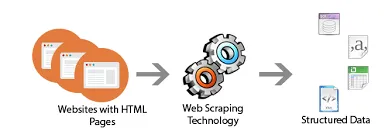

Em geral se usa essa técnica  para coletar informações de um website que não possuia API. Para compreenssão de alguns conceitos nessa aula é importante ter conhecimentos mínimos de HTML tree structure.


**Leituras complementares**
-  Básico de HTML-BeautifulSoap Aqui --> https://www.vooo.pro/insights/guia-para-iniciantes-de-web-scraping-em-python-usando-beautifulsoup/

-  Documentação oficial do BeautifulSoap --> https://www.crummy.com/software/BeautifulSoup/bs4/doc/

A base desse exercício é o exemplo do MIT: http://duspviz.mit.edu/tutorials/python-scraping/ e http://duspviz.mit.edu/_assets/data/county_housing_stats.html

### Importação das Bibliotecas Request e BeautifulSoap  

A primeira coisa que precisamos fazer para examinar uma página da web é fazer o download dela. Podemos fazer o download de páginas usando a biblioteca **requests** do Python. 

A biblioteca requests fará uma solicitação GET para um servidor da web, que fará o download do conteúdo HTML de uma determinada página da Web. Existem vários tipos diferentes de solicitações que podemos fazer usando requests, GET é apenas uma.

A biblioteca **BeautifulSoup** é usada para analisar o documento e extrair os textos a partir do elementos do HTML. Primeiro, precisamos importar a biblioteca e criar uma instância da classe BeautifulSoup para analisar um documento pretendido.

In [ ]:
import requests       # Biblioteca Requests
import bs4            # Biblioteca BeautifulSoap

Os próximos passos são testes de  outputs de uma requisição do site que desejamos "raspar" os dados. 

Utilizaremos  **http://duspviz.mit.edu/_assets/data/county_housing_stats.html**  para criar um arquivo texto (CSV) com  dados livre de formatação

Analise a imagem do site exemplo

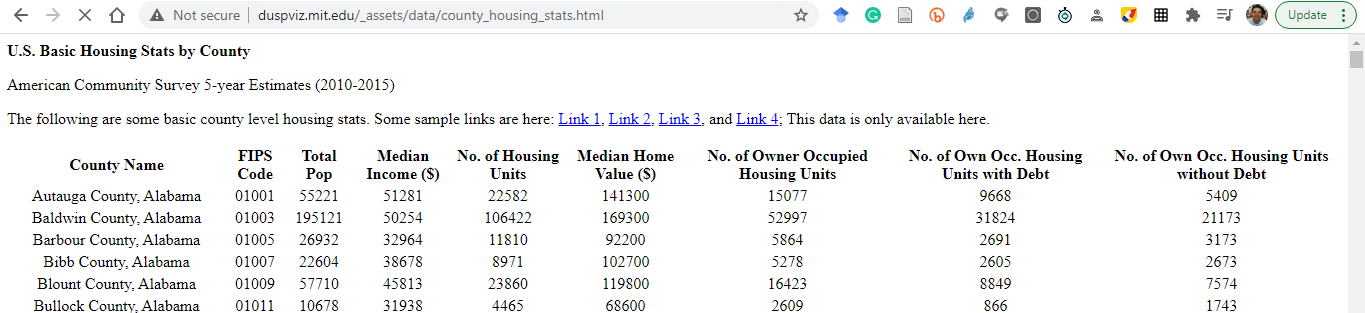

In [ ]:
# Testing output Requests
response = requests.get('http://duspviz.mit.edu/_assets/data/county_housing_stats.html')
print(response.text)                         # Print the output da página HTML

### Testando BeautifulSoup

#### Prettify é um método do BS  para visualizar a estrutura separada da página HTML

Em linhas gerais o código a seguir irá analisar response.text criado pelo objeto BeautifulSoup e atribuido-o a soup. 
O argumento html.parser indica que queremos fazer a análise.

In [ ]:
# Testing output BS

soup = bs4.BeautifulSoup(response.text, "html.parser")
print(soup.prettify())                        # Print o output unsado a função 'prettify' 

# Using the Beautiful Soup prettify() function,
# we can print the page to see the code printed in a 
# readable and legible manner.

### Navegando na estrutura de dados gerada pelo Prettify

In [ ]:
# Access the title 
# Access the title element
soup.titlelement
soup.title

In [ ]:
# Access the content of the title element
soup.title.string

In [ ]:
# Access data in the first 'p' tag
soup.p

In [ ]:
# Access data in the first 'a' tag
soup.a

In [ ]:
# Retrieve all links in the document (note it returns an array)
soup.find_all('a')

In [ ]:
# Retrieve elements by class equal to link using the attributes argument
soup.findAll(attrs={'class' : 'link'})

In [ ]:
# Retrieve a specific link by ID
soup.find(id="link3")

In [ ]:
# Access Data in the table (note it returns an array)
soup.find_all('td')

### Carregando os Dados em Arrays

A maneira mais fácil de acessar elementos (dados) da página é gravá-los em um arquivo temporário e manipulá-los e salvá-los como objetos. 

Observe que os dados da página a ser raspada são organizados em "counties" e várias colunas com números. Logo, salvá-los em arrays é maneira mais lógica e fácil de trabalhar com os dados futuramente.

In [ ]:
# Data Load
data = soup.findAll(attrs={'class':'name'})
print(data[0].string)
print(data[1].string)
print(data[2].string)
print(data[3].string)

Para evitar esse estrutura "feiosa", podemos substituir por um loop

In [ ]:
#Better data Load
data = soup.findAll(attrs={'class':'name'})
for i in data:
    print(i.string)

No entanto, esse array só traria as  "counties", abaixo o loop completo com carga de todos os dados no array

In [ ]:
# A professional-look Loop data[x]
# where x is location in the array. 
#Remember that in Python, arrays start at 0, so place 1 in a Python array is 
# actually called by using a 0,  and place 8 would be called by a 7.

data = soup.findAll(attrs={'class':['name','fips','tot-pop','median-income','no-housing-units','med-home-val','owner-occupied','house-w-debt','house-wo-debt']})
for i in data:
    print(i.string)

In [ ]:
# apenas um teste
print(data[0])
print(data[1])

In [ ]:
# apenas um teste
print(data[0].string)
print(data[1].string)

### Criando e executando o arquivo de script do BeatutifuSoap (.py) para raspagem de dados

Obeserve que podemos fazer a raspagem executando diretamente um script python através da linha de comandos, pois muitas vezes é um processo demorado. No caso dessa aula, dividimos o script em duas céluas para serem execuradas ao vivo. 

Caso deseje gerar um script .py, copie o conteúdo das duas próximas céluas em um único arquivo e execute diretamente no Python.

In [ ]:
#Opcionalmente pode ser executado dentro do Jupyter
import requests
import bs4

# load and get the page from the website
response = requests.get('http://duspviz.mit.edu/_assets/data/county_housing_stats.html')

# create the soup
soup = bs4.BeautifulSoup(response.text, "html.parser")

# find all the tags with class city or number
data = soup.findAll(attrs={'class':['name','fips','tot-pop','median-income','no-housing-units','med-home-val','owner-occupied','house-w-debt','house-wo-debt']})

# print 'data' to console optionally
print(data)

Gravando dados em um arquivo texto (csv) usando um loop simples. A Lógica é mais ou menos a mesma em vários casos

No pseudo-codigo:

- 1- Abra o arquivo de saida para escrever e apendar os dados raspados 

- 2- Defina os parâmetros do loop (While)

- 3- Escreva os cabeçalhos (headers)

- 4- Execute o Loop que irá produzir os elementos do array no arquivo 

- 5- Quando completar o Loop, fecha o arquivo 

- 6 Agora é só analisar os dados raspados :-)

In [ ]:
#Opcionalmente pode ser executado dentro do Jupyter

f = open('county_data.csv','a')           # open new file, make sure path to your data file is correct

p = 0                                     # initial place in array
l = len(data)-1                           # length of array minus one

f.write("County, State, FIPS Code, Total Pop, Median Income ($), No. of Housing Units, Median Home Value ($), No. of Owner Occupied Housing Units, No. of Owner Occ. Housing Units with Debt, No. of Owner Occ. Housing Units without Debt\n") 
                                          #write headers

while p < l:                              # while place is less than length
    f.write(data[p].string + ", ")        # write county and add comma
    p = p + 1                             # increment
    f.write(data[p].string + ", ")        # write FIPS and add comma
    p = p + 1                             # increment
    f.write(data[p].string + ", ")        # write Total Pop and add comma
    p = p + 1                             # increment
    f.write(data[p].string + ", ")        # write Median Income and add comma
    p = p + 1                             # increment
    f.write(data[p].string + ", ")        # write No. of Housing Units and add comma
    p = p + 1                             # increment
    f.write(data[p].string + ", ")        # write Median Home Value and add comma
    p = p + 1                             # increment
    f.write(data[p].string + ", ")        # write No. of Owner Occupied Housing Units and add comma
    p = p + 1                             # increment
    f.write(data[p].string + ", ")        # write No. of Owner Occ. Housing Units with Debt and add comma
    p = p + 1                             # increment
    f.write(data[p].string + "\n")        # write No. of Owner Occ. Housing Units without Debt and line break
    p = p + 1                             # increment
    
f.close()                                 # close file

Abra o arquivo texto county_data.txt e visualizar os dados raspados do site  'http://duspviz.mit.edu/_assets/data/county_housing_stats.html

## Não se esqueça de inserir seus métodos de Data Provenance na sua raspagem!

Eles irão lhe ajudar a assegurar a rastreabilidade dos dados e do processo



# Outras Bibliotecas para fazer raspagem


## UrlLib

**Urllib** no Python 3 é uma coleção de módulos que se pode usar para trabalhar com URLs. A versão atual do urllib é composta dos seguintes módulos:

- urllib.request
- urllib.error
- urllib.parse
- urllib.rebotparser

Para maiores informações - https://docs.python.org/3/library/urllib.html

## Selenium

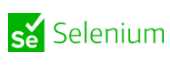

O conteúdo no qual se tem interesse nem sempre é de fácil acesso. Pode ser necessário interagir com o site para encontrá-lo: seja descendo uma página, clicando em menus e imagens. Ou talvez os dados desejados sejam apresentados utilizando JavaScript. Em todos esses casos, uma requisição do código fonte da página não é o bastante para encontrar as informações almejadas. 

O **Selenium** é usado nesses casos, é uma ferramenta que permite automatizar um browser (webdrivers), e realizar inúmeros tipos de ações com eles. Sua curva de aprendizado é mais íngrime, e por de fato abrir e controlar um browser, sua atuação é um pouco mais lenta. 

Por isso, seu uso não é recomendado quando os dados de interesse são de fácil acesso – a biblioteca *requests* dará conta do recado de forma mais rápida e eficiente.

Para maiores informações - https://www.selenium.dev/

## Scrapy 

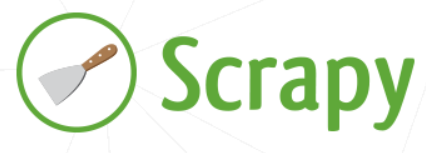
**Scrapy** é mais do que uma biblioteca, é um framework que permite não apenas extrair a informação de uma página, mas navegar por diversas páginas de forma sistemática e automatizada. 

Esse tipo de técnica recebe o nome de rastreador de rede, ou web crawler. Fornecendo uma lista de páginas inicias (seeds) que devem ser visitadas, a ferramenta é capaz de identificar todas as outras ligações destas páginas para outras – e então visitar essas novas páginas, e assim por diante. 

**Scrapy** é uma ferramenta poderosa quando se tem interesse em navegar um site, ou apenas uma parte dele ou por completo.

Para maiores informações - https://scrapy.org/

---
#### Fudamentos para Ciência Dados &copy; Copyright 2021, Sergio Serra & Jorge Zavaleta